In [62]:
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=True)

In [65]:

print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [3]:
california_housing.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
california_housing.data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


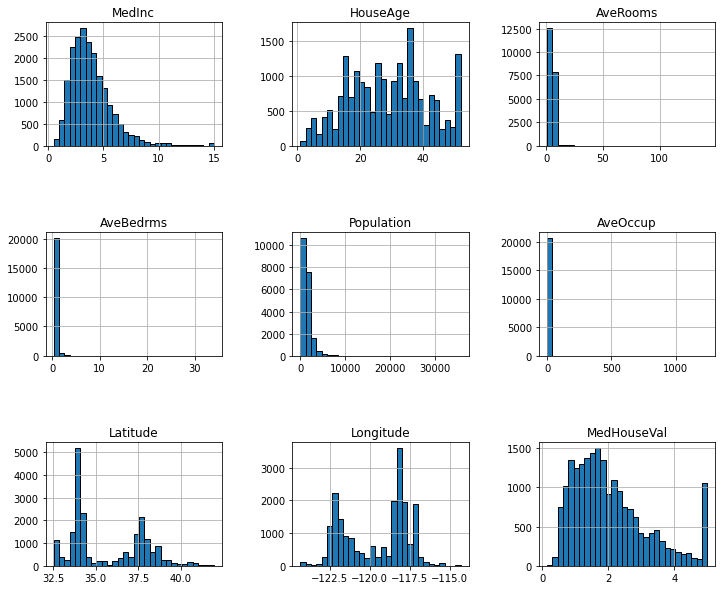

In [10]:
import matplotlib.pyplot as plt

california_housing.frame.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

In [11]:
california_housing.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
'''the dataset contains 20,640 samples and 8 features;

all features are numerical features encoded as floating number;

there is no missing values.'''

We can first focus on features for which their distributions would be more or less expected.

The median income is a distribution with a long tail. It means that the salary of people is more or less normally distributed but there is some people getting a high salary.

Regarding the average house age, the distribution is more or less uniform.

The target distribution has a long tail as well. In addition, we have a threshold-effect for high-valued houses: all houses with a price above 5 are given the value 5.

Focusing on the average rooms, average bedrooms, average occupation, and population, the range of the data is large with unnoticeable bin for the largest values. It means that there are very high and few values (maybe they could be considered as outliers?). We can see this specificity looking at the statistics for these features:

Focusing on the average rooms, average bedrooms, average occupation, and population, the range of the data is large with unnoticeable bin for the largest values. It means that there are very high and few values (maybe they could be considered as outliers?). We can see this specificity looking at the statistics for these features:

In [12]:
features_of_interest = ["AveRooms", "AveBedrms", "AveOccup", "Population"]
california_housing.frame[features_of_interest].describe()

,AveRooms,AveBedrms,AveOccup,Population
count,20640.000000,20640.000000,20640.000000,20640.000000
mean,5.429000,1.096675,3.070655,1425.476744
std,2.474173,0.473911,10.386050,1132.462122
min,0.846154,0.333333,0.692308,3.000000
25%,4.440716,1.006079,2.429741,787.000000
50%,5.229129,1.048780,2.818116,1166.000000
75%,6.052381,1.099526,3.282261,1725.000000
max,141.909091,34.066667,1243.333333,35682.000000


For each of these features, comparing the max and 75% values, we can see a huge difference. It confirms the intuitions that there are a couple of extreme values.

Up to know, we discarded the longitude and latitude that carry geographical information. In short, the combination of this feature could help us to decide if there are locations associated with high-valued houses. Indeed, we could make a scatter plot where the x- and y-axis would be the latitude and longitude and the circle size and color would be linked with the house value in the district.

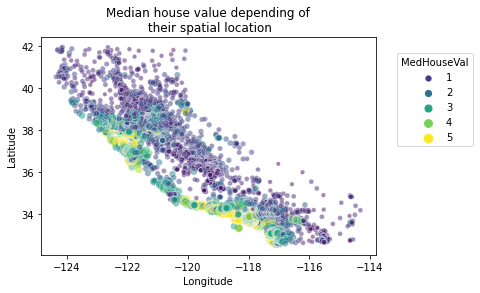

In [13]:
import seaborn as sns

sns.scatterplot(
    data=california_housing.frame,
    x="Longitude",
    y="Latitude",
    size="MedHouseVal",
    hue="MedHouseVal",
    palette="viridis",
    alpha=0.5,
)
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 0.95), loc="upper left")
_ = plt.title("Median house value depending of\n their spatial location")

We can make a final analysis by making a pair plot of all features and the target but dropping the longitude and latitude. We will quantize the target such that we can create proper histogram.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
dataset=pd.DataFrame(california_housing.data,columns=california_housing.feature_names)

Latitude and Longitude are hihly corelated with each other

In [15]:

# Drop the unwanted columns
columns_drop = ["Longitude", "Latitude"]
dataset_new=dataset.drop(columns=columns_drop)
dataset_new.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,3.422


In [7]:
dataset['Price']=california_housing.target

In [16]:
dataset_new.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,3.422


In [9]:
### Summarise the Stats of Data
dataset.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [17]:
dataset_new.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,5.000010


In [18]:
## Check the missing Values
dataset_new.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Price         0
dtype: int64

In [19]:
### EXploratory Data Analysis
## Correlation
dataset.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


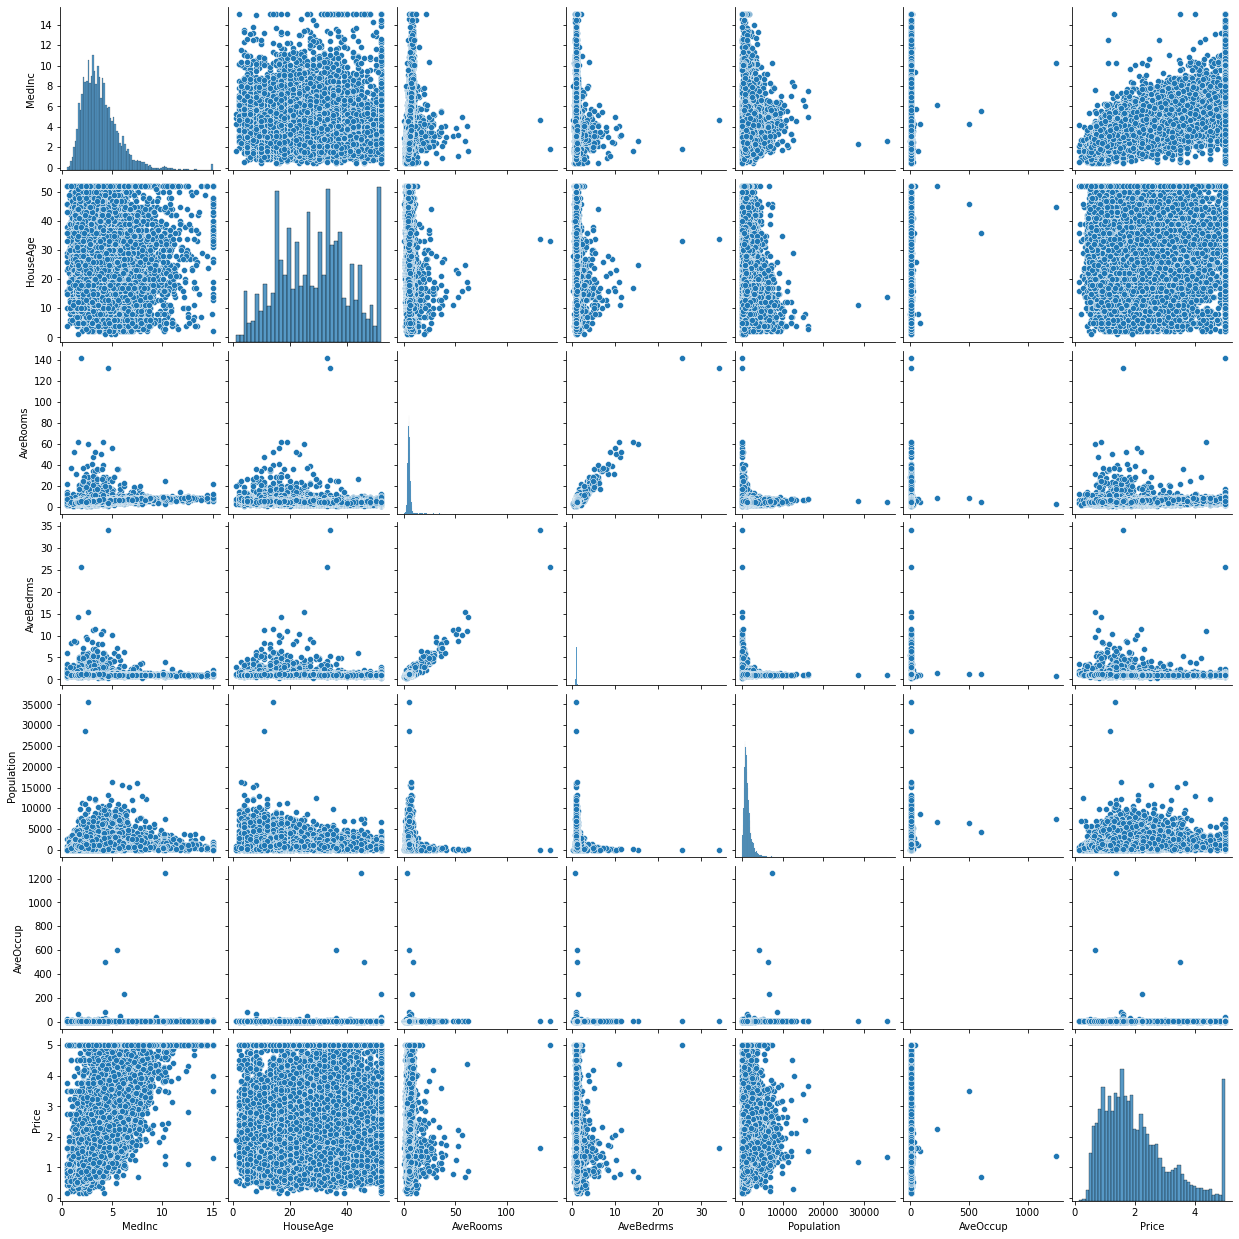

In [20]:
import seaborn as sns
sns.pairplot(dataset_new)

Analyzing the corelated Features

In [21]:
dataset_new.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,-0.023737
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,1.000000


See the corelation graph between MedInc and Price

Text(0, 0.5, 'Price')

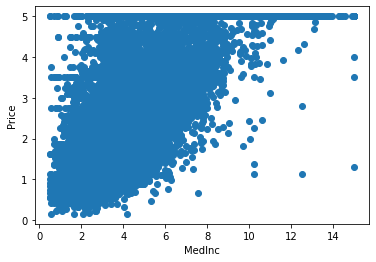

In [23]:
plt.scatter(dataset_new['MedInc'],dataset_new['Price'])
plt.xlabel("MedInc")
plt.ylabel("Price")

<AxesSubplot:xlabel='AveRooms', ylabel='Price'>

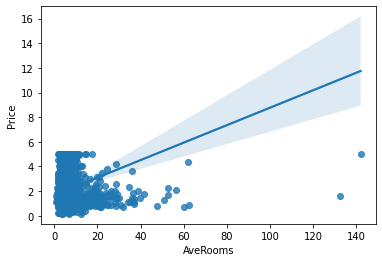

In [25]:
import seaborn as sns
sns.regplot(x="AveRooms",y="Price",data=dataset_new)

In [26]:
## Independent and Dependent features

X=dataset_new.iloc[:,:-1]
y=dataset_new.iloc[:,-1]

In [28]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467
...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209


In [31]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: Price, Length: 20640, dtype: float64

In [32]:
##Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [33]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
7061,4.1312,35.0,5.882353,0.975490,1218.0,2.985294
14689,2.8631,20.0,4.401210,1.076613,999.0,2.014113
17323,4.2026,24.0,5.617544,0.989474,731.0,2.564912
10056,3.1094,14.0,5.869565,1.094203,302.0,2.188406
15750,3.3068,52.0,4.801205,1.066265,1526.0,2.298193
...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891


In [34]:
## Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [35]:
X_train=scaler.fit_transform(X_train)

In [36]:
X_test=scaler.transform(X_test)

In [37]:
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

In [38]:
X_train

array([[ 0.13350629,  0.50935748,  0.18106017, -0.27384968, -0.18411678,
        -0.01082519],
       [-0.53221805, -0.67987313, -0.42262953, -0.04786832, -0.37619075,
        -0.08931585],
       [ 0.1709897 , -0.36274497,  0.07312833, -0.24260044, -0.61124018,
        -0.04480037],
       ...,
       [-0.49478713,  0.58863952, -0.59156984, -0.04097756,  0.28773617,
         0.01720102],
       [ 0.96717102, -1.07628333,  0.39014889, -0.06716375,  0.30615422,
         0.00482125],
       [-0.68320166,  1.85715216, -0.82965604, -0.0877285 ,  1.0446304 ,
        -0.0816717 ]])

$$$$$$   Model Training   $$$$$$$$

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
regression=LinearRegression()

In [41]:
regression.fit(X_train,y_train)

LinearRegression()

In [42]:
## print the coefficients and the intercept
print(regression.coef_)

[ 1.03312467  0.21204595 -0.54173179  0.49571361  0.02880157 -0.05512995]


In [43]:
print(regression.intercept_)

2.0692396089424143


In [44]:
## on which parameters the model has been trained
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [45]:
### Prediction With Test Data
reg_pred=regression.predict(X_test)

In [46]:
reg_pred

array([1.00516269, 1.5625964 , 2.67258851, ..., 2.09904154, 1.6899986 ,
       1.87039695])

Assumptions

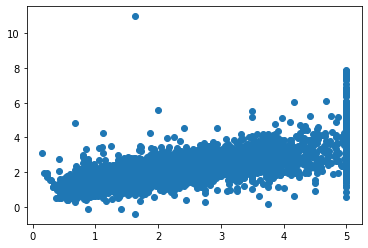

In [47]:
## plot a scatter plot for the prediction
plt.scatter(y_test,reg_pred)

In [48]:
## Residuals
residuals=y_test-reg_pred

In [49]:
residuals

20046   -0.528163
3024    -1.104596
15663    2.327421
20484   -0.456965
9814     0.797987
           ...   
17505    0.325795
13512   -0.514972
10842    0.084958
16559   -0.495999
5786     0.227603
Name: Price, Length: 6192, dtype: float64

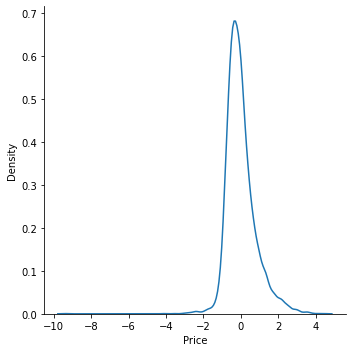

In [50]:
## Plot this residuals 

sns.displot(residuals,kind="kde")

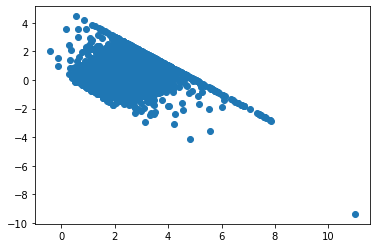

In [51]:
## Scatter plot with respect to prediction and residuals
## uniform distribution
plt.scatter(reg_pred,residuals)

In [52]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test,reg_pred))
print(mean_squared_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

0.5714315583282218
0.6164430885405112
0.7851388976101689


R Square

In [53]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)

0.5303434273202937


Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]

where:

R2: The R2 of the model n: The number of observations k: The number of predictor variables

New Data Prediction

In [73]:
california_housing.data["MedInc"]

0        8.3252
1        8.3014
2        7.2574
3        5.6431
4        3.8462
          ...  
20635    1.5603
20636    2.5568
20637    1.7000
20638    1.8672
20639    2.3886
Name: MedInc, Length: 20640, dtype: float64

In [54]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.529887818680669

Pickling The Model file For Deployment

In [55]:
import pickle

In [56]:
pickle.dump(regression,open('regmodel.pkl','wb'))

In [57]:
pickled_model=pickle.load(open('regmodel.pkl','rb'))

In [82]:
california_housing.data[:0]

<class 'pandas.core.frame.DataFrame'>


In [78]:
## Prediction
#pickled_model.predict(scaler.transform(california_housing.data["MedInc"].reshape(1,-1)))